In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.model_selection import train_test_split

https://stackoverflow.com/questions/77283252/why-does-my-response-surface-look-like-this

In [6]:
f_bru = [9060.3, 4373.6, 2913.2, 2146.7, 1686.9, 1396.2, 1155.1, 1015.2,
         1048.3, 841.1, 3302.2, 1768.5, 1245.4, 853.3, 688.7, 572.4, 578.4,
         473.9, 444.6, 384.6, 2342.3, 1183.2, 801.0, 539.7, 460.9, 401.8,
         331.1, 284.7, 271.5, 235.9, 1758.1, 822.2, 582.0, 373.5, 329.7,
         305.3, 243.0, 218.5, 193.4, 159.9, 1402.8, 666.4, 419.5, 355.7,
         269.5, 219.6, 198.7, 177.1, 143.4, 136.7, 1111.4, 530.7, 340.8,
         270.6, 225.7, 188.1, 152.4, 123.6, 123.6, 105.2, 948.3, 483.5,
         315.2, 239.9, 181.7, 151.9, 131.3, 117.2, 112.2, 97.7, 800.4,
         392.9, 277.0, 214.3, 149.8, 145.1, 103.2, 105.7, 87.1, 85.5, 724.8,
         351.1, 240.3, 168.6, 145.1, 116.8, 108.0, 83.5, 86.0, 70.5, 650.4,
         318.6, 209.8, 162.8, 126.7, 98.9, 95.9, 80.9, 62.6, 65.2]


t = [15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 
     35.5625, 35.5625, 35.5625, 35.5625, 35.5625, 35.5625, 35.5625, 35.5625, 35.5625, 35.5625, 
     56.125, 56.125, 56.125, 56.125, 56.125, 56.125, 56.125, 56.125, 56.125, 56.125, 
     76.6875, 76.6875, 76.6875, 76.6875, 76.6875, 76.6875, 76.6875, 76.6875, 76.6875, 76.6875, 
     97.25, 97.25, 97.25, 97.25, 97.25, 97.25, 97.25, 97.25, 97.25, 97.25, 
     117.75, 117.75, 117.75, 117.75, 117.75, 117.75, 117.75, 117.75, 117.75, 117.75, 
     138.375, 138.375, 138.375, 138.375, 138.375, 138.375, 138.375, 138.375, 138.375, 138.375, 
     158.875, 158.875, 158.875, 158.875, 158.875, 158.875, 158.875, 158.875, 158.875, 158.875, 
     179.5, 179.5, 179.5, 179.5, 179.5, 179.5, 179.5, 179.5, 179.5, 179.5, 
     200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0]

d = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
     10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]

In [10]:


d1 = list(d)
t1 = list(t)
a = [(t1[i], d1[i]) for i in range(len(t))]

y = np.array(f_bru)
x_train, x_test, y_train, y_split = train_test_split(a,y, test_size=0.2, train_size=0.8)


t_train, d_train = zip(*x_train)
t_test, d_test = zip(*x_test)

t_test = np.array(t_test)
d_test = np.array(d_test)
t_train = np.array(t_train)
d_train = np.array(d_train)

t = np.array(t)
d = np.array(d)
f_bru = np.array(f_bru)

def func(td, c1 = 1, c2 = 1, c3 = 1, c4 = 1): 
    t,d = td 
    return c1 + c2*d**-1 + c3*t**-1 + c4*(d**-1*t**-1)

popt, pcov = optimize.curve_fit(func, (t,d), f_bru)

#Generate fitted surface
t_fit, d_fit = np.meshgrid(t, d)
f_bru_fit = func((t_fit, d_fit), *popt)

#Approximated values of f_bru
f_bru_predicted = func((t_test, d_test), *popt)

In [13]:
t = np.array(t)
d = np.array(d)
z = np.array(f_bru)

In [15]:
tlin = np.linspace(t.min(), t.max(), 50)
dlin = np.linspace(d.min(), d.max(), 50)
T, D = np.meshgrid(tlin, dlin)

In [16]:
Z = func((T, D), *popt)

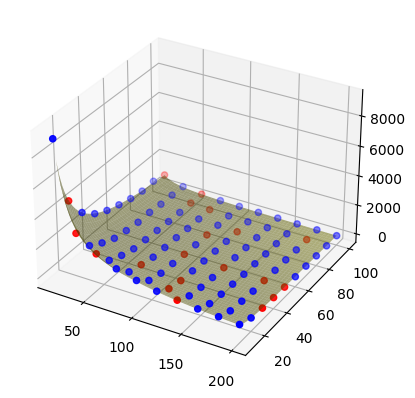

In [20]:
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.plot_surface(T, D, Z, color='y', alpha = 0.5)
axes.scatter(t_train, d_train, y_train, c = 'b', marker = 'o', label = 'Training set')
axes.scatter(t_test, d_test, y_split, c = 'r', marker = 'o', label = "Testing set")


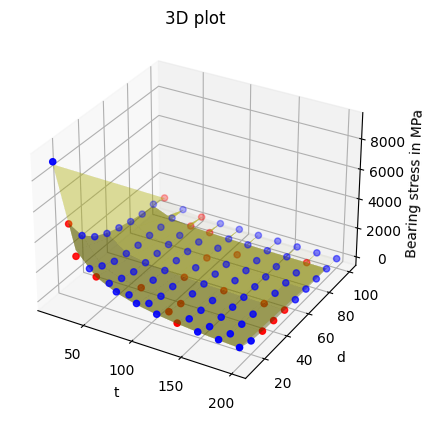

In [11]:

#plot the training and validation data points and the fitted surface 
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(t_train, d_train, y_train, c = 'b', marker = 'o', label = 'Training set')
axes.scatter(t_test, d_test, y_split, c = 'r', marker = 'o', label = "Testing set")
#generate a plot with surface fit 
axes.plot_surface(t_fit, d_fit, f_bru_fit, color='y', alpha = 0.05)
axes.set_xlabel('t')
axes.set_ylabel('d')
axes.set_zlabel('Bearing stress in MPa')
plt.title('3D plot')
plt.show()